In [1]:
from lender_main import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

In [3]:
df = read_full_data()

In [4]:
df.shape

(2945384, 105)

In [5]:
for col in ['NUM_TEAM_LOANS',"NUM_TEAM_MEMBERSHIPS",'NUM_TEAM_MESSAGES']:
    print((df[col] >= df[col].quantile(0.99)).sum())

29547
37833
36985


In [6]:
np.all((df[['NUM_TEAM_LOANS',"NUM_TEAM_MEMBERSHIPS"]] >= df[['NUM_TEAM_LOANS',"NUM_TEAM_MEMBERSHIPS"]].quantile(0.99)),axis=1).sum()

8703

In [7]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_MEMBERSHIPS"]] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_MEMBERSHIPS"]].quantile(0.99)),axis=1).sum()

10613

In [8]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]].quantile(0.99)),axis=1).sum()

10401

In [10]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']].quantile(0.99)),axis=1).sum()

4731

In [9]:
from ploting import *

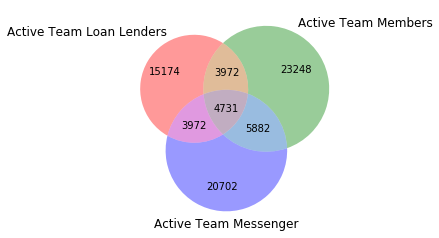

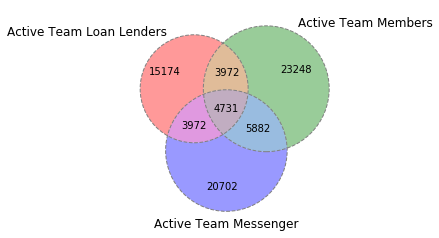

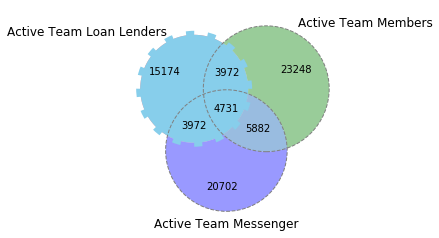

In [14]:
plot_venn_3(29547,37833,36985,8703,10401,10613,4731,'Active Team Loan Lenders',"Active Team Members",'Active Team Messenger')

In [5]:
df = create_lenders_labels(df)

In [6]:
df.shape

(2945384, 109)

In [26]:
((df['dollar_outliers?']==True) & (df['team_outliers?'] == True)).sum()

63129

In [25]:
((df['dollar_outliers?']==True) & (df['team_outliers?'] == True) & (df['comments_outliers?'] == True)).sum()

6211

In [27]:
((df['dollar_outliers?']==True) & (df['comments_outliers?'] == True)).sum()

18081

In [28]:
((df['team_outliers?']==True) & (df['comments_outliers?'] == True)).sum()

6853

In [36]:
(df['dollar_outliers?']==True).sum()

802416

In [39]:
(df['team_outliers?']==True).sum()

79379

In [37]:
802416-56918-11870-6211

727417

In [43]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3,venn3_circles

def plot_venn_3 (a, b, c, a_and_b,a_and_c,b_and_c,a_and_b_and_c,a_label="Group A",b_label="Group B",c_label="Group C"):
    position0 = a-a_and_b-a_and_c+a_and_b_and_c
    position1 = b-b_and_c-a_and_b+a_and_b_and_c
    position2 = a_and_b-a_and_b_and_c
    position3 = c-a_and_c-b_and_c+a_and_b_and_c
    position4 = a_and_b-a_and_b_and_c
    position5 = b_and_c-a_and_b_and_c
    position6 = a_and_b_and_c
    
    # Custom text labels: change the label of group A
    v=venn3(subsets = (position0, position1, position2, position3,position4,position5,position6), set_labels = (a_label, b_label, c_label))
    #v.get_label_by_id('A').set_text('The biggest outliers!')
    plt.show()

    # Line style: can be 'dashed' or 'dotted' for example
    v=venn3(subsets = (position0, position1, position2, position3,position4,position5,position6), set_labels = (a_label, b_label, c_label))
    c=venn3_circles(subsets = (position0, position1, position2, position3,position4,position5,position6), linestyle='dashed', linewidth=1, color="grey")
    plt.show()

    # Change one group only
    v=venn3(subsets = (position0, position1, position2, position3,position4,position5,position6), set_labels = (a_label, b_label, c_label))
    c=venn3_circles(subsets = (position0, position1, position2, position3,position4,position5,position6), linestyle='dashed', linewidth=1, color="grey")
    c[0].set_lw(8.0)
    c[0].set_ls('dotted')
    c[0].set_color('skyblue')
    plt.show()

    # Color
    v.get_patch_by_id('100').set_alpha(1.0)
    v.get_patch_by_id('100').set_color('white')
    plt.show()


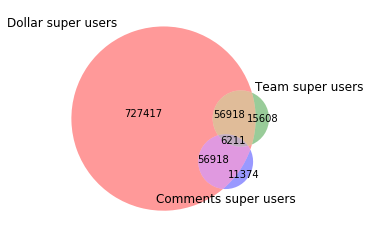

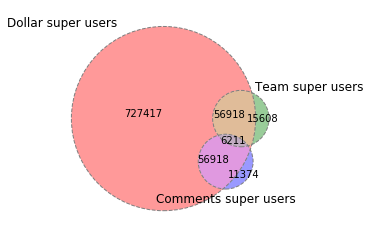

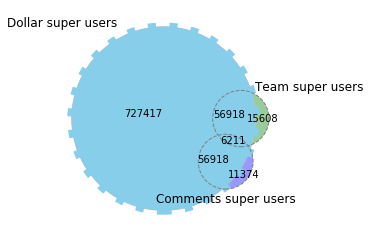

In [13]:
plot_venn_3(802416,79379,30097,63129,18081,6853,6211,a_label="Dollar super users",b_label="Team super users",c_label="Comments super users")

In [15]:
# df['comments_outliers?'] = np.any(df[['NUM_JOURNAL_COMMENTS','NUM_LOAN_COMMENTS','NUM_STATEMENT_COMMENTS']] != np.zeros((df.shape[0],3)),axis=1)
for col in ['NUM_JOURNAL_COMMENTS',"NUM_LOAN_COMMENTS",'NUM_STATEMENT_COMMENTS']:
    print((df[col] != np.zeros(df.shape[0],)).sum())

6417
24526
48


In [20]:
np.all(df[['NUM_JOURNAL_COMMENTS',"NUM_LOAN_COMMENTS"]] != np.zeros((df.shape[0],2)),axis=1).sum()

889

In [21]:
np.all(df[['NUM_STATEMENT_COMMENTS',"NUM_LOAN_COMMENTS"]] != np.zeros((df.shape[0],2)),axis=1).sum()

2

In [22]:
np.all(df[['NUM_JOURNAL_COMMENTS',"NUM_STATEMENT_COMMENTS"]] != np.zeros((df.shape[0],2)),axis=1).sum()

3

In [23]:
np.all(df[['NUM_JOURNAL_COMMENTS',"NUM_LOAN_COMMENTS",'NUM_STATEMENT_COMMENTS']] != np.zeros((df.shape[0],3)),axis=1).sum()

0

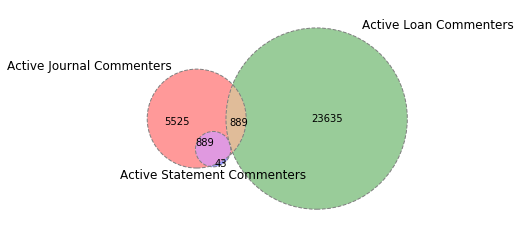

In [24]:
plot_venn_3(6417,24526,48,889,3,2,0,"Active Journal Commenters","Active Loan Commenters","Active Statement Commenters")

In [7]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_MEMBERSHIPS"]] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_MEMBERSHIPS"]].quantile(0.99)),axis=1).sum()

10613

In [8]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]].quantile(0.99)),axis=1).sum()

10401

In [10]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']].quantile(0.99)),axis=1).sum()

4731

In [28]:
# df['comments_outliers?'] = np.any(df[['NUM_JOURNAL_COMMENTS','NUM_LOAN_COMMENTS','NUM_STATEMENT_COMMENTS']] != np.zeros((df.shape[0],3)),axis=1)
for col in dollar_amount_outliers_list:
    print((df[col]>= df[col].quantile(0.9)).sum())

301982
295304
304322


In [31]:
np.all((df[['LIFETIME_DONATION_TOTAL',
        'LIFETIME_DEPOSIT_TOTAL']] >= df[['LIFETIME_DONATION_TOTAL',
        'LIFETIME_DEPOSIT_TOTAL']].quantile(0.90)),axis=1).sum()

184214

In [34]:
np.all((df[['LIFETIME_DONATION_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']] >= df[['LIFETIME_DONATION_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']].quantile(0.90)),axis=1).sum()

191376

In [33]:
np.all((df[['LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']] >= df[['LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']].quantile(0.90)),axis=1).sum()

217306

In [30]:
np.all((df[['LIFETIME_DONATION_TOTAL',
        'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']] >= df[['LIFETIME_DONATION_TOTAL',
        'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']].quantile(0.90)),axis=1).sum()

191376

In [7]:
np.all((df[] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_MEMBERSHIPS"]].quantile(0.99)),axis=1).sum()

10613

In [8]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS"]].quantile(0.99)),axis=1).sum()

10401

In [10]:
np.all((df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']] >= df[['NUM_TEAM_MESSAGES',"NUM_TEAM_LOANS",'NUM_TEAM_MEMBERSHIPS']].quantile(0.99)),axis=1).sum()

4731

In [25]:
dollar_amount_outliers_list = ['LIFETIME_DONATION_TOTAL',
        'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']

In [38]:
a = np.array([[0,5,6,3,2]])

In [40]:
a = a.flatten()

In [41]:
np.sort(a)

array([0, 2, 3, 5, 6])

In [42]:
np.sort(a)[-2:]

array([5, 6])